In [7]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [22]:
df_perf_test=pd.read_csv(r'https://raw.githubusercontent.com/Ciarzi/DP3_GP1/main/datasets/own_data/train.csv')
data = df_perf_test.drop('flag',axis = 1)
data.head()

,loannumber,historial,referido,age,due_per_day,interes,cuenta_corriente,cuenta_otra,cuenta_ahorro,employment
0,12,0,1,50,1150,15.00,0,1,0,2
1,7,1,1,37,1483,11.25,0,1,0,2
2,3,0,1,44,766,15.00,0,0,1,2
3,9,1,1,35,1466,10.00,0,1,0,2
4,8,1,1,49,650,30.00,0,0,1,2


In [23]:
data.shape

(4358, 10)

In [24]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,4.358000e+03,4.358000e+03,4.358000e+03,4.358000e+03,4.358000e+03,4.358000e+03,4.358000e+03,4.358000e+03,4.358000e+03,4.358000e+03
mean,1.396058e-16,-6.416773e-16,4.482290e-16,2.011802e-16,1.547383e-16,-1.201935e-16,1.323319e-15,-4.024622e-16,-1.221296e-16,-4.093406e-16
std,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00
min,-8.693714e-01,-1.709559e+00,-1.829671e+00,-1.832508e+00,-1.145114e+00,-2.825910e+00,-1.220841e-01,-5.047999e-01,-1.895311e+00,-3.294533e+00
25%,-8.693714e-01,-1.709559e+00,-2.959710e-01,-6.976165e-01,-9.419195e-01,-8.789685e-01,-1.220841e-01,-5.047999e-01,5.276180e-01,4.649786e-01
50%,-3.221847e-01,5.849461e-01,-2.959710e-01,-4.910696e-02,6.798860e-02,9.450248e-02,-1.220841e-01,-5.047999e-01,5.276180e-01,4.649786e-01
75%,4.985953e-01,5.849461e-01,-2.959710e-01,5.994025e-01,2.196265e-01,1.067973e+00,-1.220841e-01,-5.047999e-01,5.276180e-01,4.649786e-01
max,5.970462e+00,5.849461e-01,2.771429e+00,3.679823e+00,4.083359e+00,1.067973e+00,8.191077e+00,1.980983e+00,5.276180e-01,4.649786e-01


ELBOW

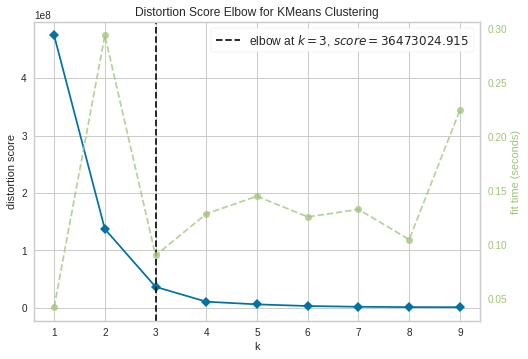

In [25]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10)).fit(data)
visualizer.show()

KMEANS

In [26]:
clusters = 3
kmeans = KMeans(n_clusters = clusters)
kmeans.fit(data_scaled)
print(kmeans.labels_)

[2 2 0 ... 0 1 0]


In [27]:
df_perf_test['Kmeans_Cluster']=kmeans.labels_
df_perf_test.head()

,loannumber,historial,referido,flag,age,due_per_day,interes,cuenta_corriente,cuenta_otra,cuenta_ahorro,employment,Kmeans_Cluster
0,12,0,1,1,50,1150,15.00,0,1,0,2,2
1,7,1,1,1,37,1483,11.25,0,1,0,2,2
2,3,0,1,1,44,766,15.00,0,0,1,2,0
3,9,1,1,1,35,1466,10.00,0,1,0,2,2
4,8,1,1,1,49,650,30.00,0,0,1,2,1


In [28]:
df_perf_test.to_csv("cluster_train.csv",index=False)

VISUALIZATION

In [29]:
pca = PCA(n_components=3)
pca.fit(data_scaled)
pca_data = pd.DataFrame(pca.transform(data_scaled))
pca_data.head()
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.3100257  0.15131958 0.1231759 ]
Cumulative variance explained by 3 principal components: 58.45%


In [30]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(data_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))


Explained variation per principal component: [0.3100257  0.15131958]
Cumulative variance explained by 2 principal components: 46.13%


In [31]:
pd.DataFrame(pca_data).describe()

,0,1,2
count,4.358000e+03,4.358000e+03,4.358000e+03
mean,3.357673e-17,-6.980292e-18,1.095447e-17
std,1.760957e+00,1.230261e+00,1.109974e+00
min,-2.232516e+00,-3.450516e+00,-3.437897e+00
25%,-1.541333e+00,-8.606572e-01,-6.665803e-01
50%,-4.165411e-01,8.347948e-02,-4.009930e-02
75%,9.969571e-01,5.708656e-01,5.744841e-01
max,6.796444e+00,4.166965e+00,6.686287e+00


In [32]:
''' Generating different colors in ascending order
								of their hsv values '''
colors = list(zip(*sorted((
					tuple(mcolors.rgb_to_hsv(
						mcolors.to_rgba(color)[:3])), name)
					for name, color in dict(
							mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
													).items())))[1]


# number of steps to taken generate n(clusters) colors
skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]


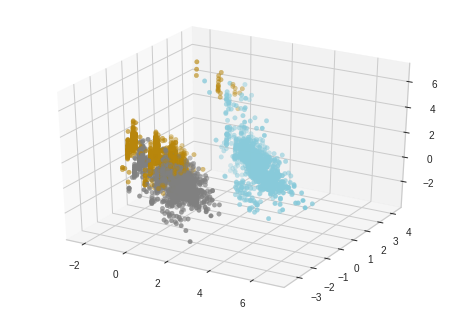

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
		c = list(map(lambda label : cluster_colors[label],
											kmeans.labels_)))

str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))

list(map(lambda data1, data2, data3, str_label:'', pca_data[0], pca_data[1],
		pca_data[2], str_labels))

plt.show()


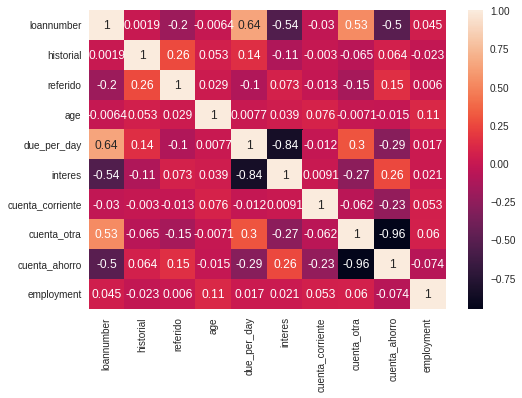

In [19]:
# generating correlation heatmap
sns.heatmap(data.corr(), annot = True)
 
# posting correlation heatmap to output console
plt.show()